Missing values in dataset:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64
Accuracy: 100.00%


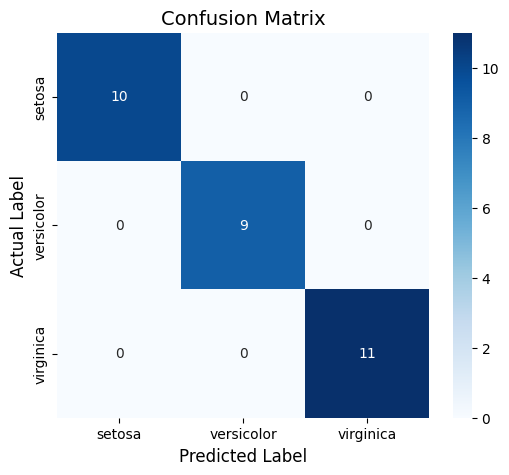

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Step 1: Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Target'] = iris.target  # Add the target column to the DataFrame

# Step 2: Preprocessing the dataset
# Check for missing values
print("Missing values in dataset:\n", df.isnull().sum())

# Step 3: Split data into features (X) and target (y)
X = df.drop("Target", axis=1)  # Features (all columns except target)
y = df["Target"]  # Target variable

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Naïve Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Step 6: Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 7: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 8: Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("Actual Label", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

# Step 9: Print Classification Report (Optional for more detailed performance metrics)
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:\n")
print(report)
